*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/2_function_distribution.ipynb)*

# Time Adverbial Distribution and Collocations
## Function Distribution
### Cody Kingham
<a href="../../../docs/sponsors.md"><img height=200px width=200px align="left" src="../../../docs/images/CambridgeU_BW.png"></a>

In [2]:
! echo "last updated:"; date

last updated:
Sat  4 Jul 2020 11:10:57 BST


## Introduction

This notebook will produce data for my in-progress article on time adverbial components. 

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [3]:
# see config.py for variables
# config.py is used across the notebooks 
# for the article project
from config import *

In [4]:
# load broad dataset for distribution analysis
phrase_df = pd.read_csv(broad_dataset) 
phrase_df.set_index('node', inplace=True)
phrase_df['parsed'] = phrase_df.index.isin(functs_df.index) * 1

# define sample of phrase functions for distribution
# analysis
functions_sample = sorted([
    'Adju',
    'Cmpl',
    'Loca',
    'Objc',
    'Subj',
    'Time',
])
funct_sample = phrase_df[phrase_df.s_function.isin(functions_sample)]

In [5]:
funct_sample.shape

(99426, 20)

## Deviation of Proportions

Now we'll look to see how representative the datasample is across the<br>
Hebrew Bible. Have the selection requirements negatively affected any of the books?

In [6]:
# make a cross-tabulation from function to 
# book, n_pa, n_heads, and n_daughters to 
# enable selection of data as needed

by_book = pd.pivot_table(
    funct_sample, 
    index='s_function', 
    columns=['n_phrase_atoms', 'n_heads', 'n_relas', 'parsed', 'book'], 
    aggfunc='size', 
    fill_value=0
)

# result is a multi-index df
by_book.head()

n_phrase_atoms    1                                                ...  12  \
n_heads            1                                               ...   2   
n_relas            0                                               ...   0   
parsed             0                                               ...   0   
book           1 Kgs 1 Sam 2 Kgs 2 Sam Deut Eccl Ezek Gen Isa Jer  ... Gen   
s_function                                                         ...       
Adju               1     0     0     0    0    0    0   0   0   0  ...   0   
Cmpl               0     0     0     0    0    0    1   2   1   0  ...   1   
Loca               0     0     0     0    0    0    0   0   0   0  ...   0   
Objc               0     0     0     0    0    2    1   6   0   1  ...   0   
Subj               1     1     1     2    2   13    1   2   3   0  ...   0   

n_phrase_atoms                        13    14          15  16  
n_heads            4             5     4     5           1   6  
n_relas            0             0     0     0           0   0  
parsed             0             0     0     0           0   0  
book           1 Kgs 2 Chr Jer Gen 2 Kgs 1 Chr 2 Kgs 2 Chr Jer  
s_function                                                      
Adju               0     0   0   0     0     0     0     0   0  
Cmpl               1     0   0   0     0     0     0     0   0  
Loca               0     0   0   0     0     0     0     0   0  
Objc               0     1   0   0     0     0     1     1   0  
Subj               0     0   1   1     1     1     0     0   1  

[5 rows x 1108 columns]

### Does the sample selection affect book-by-book representation of functions?

In [7]:
# exp_prop is a table of ratios which state 
# what proportion of a function's total uses is represented within a given book
# the observed proportion will be that subset of phrases that fit our selection
# criteria, i.e. na=1, nh=1, nd=0
exp_freq = by_book.groupby(axis=1, level='book').sum() # group by book column
exp_prop = exp_freq.div(exp_freq.sum(1), 0)

# observed proportion is the ratio of the selected sample function's
# total representation within a given book: in this case only functions
# which have 1 atom, 1 head, 0 relas, and parse value of 1
obv_freq = by_book[(1, 1, 0, 1)] # select multindex
obv_prop = obv_freq.div(obv_freq.sum(1), 0)

# the deviation of proportions will be the DIFFERENCE between the expected ratios 
# (calculated across the whole dataset) and the ratios across the selected subset
# of phrases
deviation_prop = round(exp_prop - obv_prop, 2)

In [8]:
exp_freq

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,420,309,169,515,237,235,48,95,377,86,...,20,160,432,8,244,908,22,59,88,20
Cmpl,639,1342,1695,1273,1314,1229,225,253,1546,196,...,53,444,1603,29,532,1927,160,125,309,74
Loca,61,130,80,114,123,87,29,9,199,40,...,2,65,156,2,22,126,23,6,21,3
Objc,573,865,826,911,790,628,206,134,1055,190,...,51,284,1062,19,732,1998,75,56,200,65
Subj,1362,1318,1686,1167,1129,1380,187,222,1152,426,...,84,536,1520,39,1090,2127,148,183,356,76
Time,101,191,253,196,175,168,22,53,201,30,...,6,103,187,11,49,298,26,5,50,14


In [9]:
exp_prop

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,0.044667,0.032862,0.017973,0.054770,0.025205,0.024992,0.005105,0.010103,0.040094,0.009146,...,0.002127,0.017016,0.045943,0.000851,0.025949,0.096565,0.002340,0.006275,0.009359,0.002127
Cmpl,0.021611,0.045387,0.057325,0.043053,0.044440,0.041565,0.007610,0.008557,0.052286,0.006629,...,0.001792,0.015016,0.054214,0.000981,0.017992,0.065172,0.005411,0.004228,0.010450,0.002503
Loca,0.023489,0.050058,0.030805,0.043897,0.047362,0.033500,0.011167,0.003466,0.076627,0.015402,...,0.000770,0.025029,0.060069,0.000770,0.008471,0.048518,0.008856,0.002310,0.008086,0.001155
Objc,0.025587,0.038626,0.036885,0.040681,0.035277,0.028043,0.009199,0.005984,0.047111,0.008484,...,0.002277,0.012682,0.047423,0.000848,0.032687,0.089220,0.003349,0.002501,0.008931,0.002903
Subj,0.043344,0.041944,0.053655,0.037138,0.035929,0.043917,0.005951,0.007065,0.036661,0.013557,...,0.002673,0.017058,0.048372,0.001241,0.034688,0.067689,0.004710,0.005824,0.011329,0.002419
Time,0.024994,0.047266,0.062608,0.048503,0.043306,0.041574,0.005444,0.013116,0.049740,0.007424,...,0.001485,0.025489,0.046276,0.002722,0.012126,0.073744,0.006434,0.001237,0.012373,0.003464


In [10]:
obv_freq

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,326,223,138,381,183,197,45,80,286,71,...,20,119,317,7,234,823,15,52,69,19
Cmpl,534,1102,1514,998,1122,1074,205,208,1265,181,...,52,375,1418,28,513,1808,147,106,272,65
Loca,51,101,73,92,102,79,29,9,137,39,...,2,51,131,2,19,112,23,6,17,3
Objc,382,636,688,615,583,499,185,105,755,149,...,50,206,814,18,687,1797,65,52,170,59
Subj,998,1038,1492,847,872,1107,167,182,798,365,...,77,330,1192,35,976,1950,129,161,316,69
Time,82,159,231,155,135,153,19,43,183,24,...,6,78,165,11,45,257,25,3,40,12


In [11]:
obv_prop

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,0.041720,0.028539,0.017661,0.048759,0.023420,0.025211,0.005759,0.010238,0.036601,0.009086,...,0.002560,0.015229,0.040568,0.000896,0.029946,0.105324,0.001920,0.006655,0.008830,0.002432
Cmpl,0.020672,0.042660,0.058609,0.038634,0.043434,0.041576,0.007936,0.008052,0.048970,0.007007,...,0.002013,0.014517,0.054893,0.001084,0.019859,0.069991,0.005691,0.004103,0.010530,0.002516
Loca,0.023546,0.046630,0.033703,0.042475,0.047091,0.036473,0.013389,0.004155,0.063250,0.018006,...,0.000923,0.023546,0.060480,0.000923,0.008772,0.051708,0.010619,0.002770,0.007849,0.001385
Objc,0.021140,0.035196,0.038074,0.034034,0.032263,0.027615,0.010238,0.005811,0.041782,0.008246,...,0.002767,0.011400,0.045047,0.000996,0.038019,0.099447,0.003597,0.002878,0.009408,0.003265
Subj,0.038132,0.039661,0.057007,0.032363,0.033318,0.042297,0.006381,0.006954,0.030491,0.013946,...,0.002942,0.012609,0.045545,0.001337,0.037292,0.074507,0.004929,0.006152,0.012074,0.002636
Time,0.023556,0.045677,0.066360,0.044527,0.038782,0.043953,0.005458,0.012353,0.052571,0.006895,...,0.001724,0.022407,0.047400,0.003160,0.012927,0.073829,0.007182,0.000862,0.011491,0.003447


In [12]:
deviation_prop

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,0.00,0.0,0.0,0.01,0.0,-0.0,-0.0,-0.0,0.00,0.0,...,-0.0,0.0,0.01,-0.0,-0.00,-0.01,0.0,-0.0,0.0,-0.0
Cmpl,0.00,0.0,-0.0,0.00,0.0,-0.0,-0.0,0.0,0.00,-0.0,...,-0.0,0.0,-0.00,-0.0,-0.00,-0.00,-0.0,0.0,-0.0,-0.0
Loca,-0.00,0.0,-0.0,0.00,0.0,-0.0,-0.0,-0.0,0.01,-0.0,...,-0.0,0.0,-0.00,-0.0,-0.00,-0.00,-0.0,-0.0,0.0,-0.0
Objc,0.00,0.0,-0.0,0.01,0.0,0.0,-0.0,0.0,0.01,0.0,...,-0.0,0.0,0.00,-0.0,-0.01,-0.01,-0.0,-0.0,-0.0,-0.0
Subj,0.01,0.0,-0.0,0.00,0.0,0.0,-0.0,0.0,0.01,-0.0,...,-0.0,0.0,0.00,-0.0,-0.00,-0.01,-0.0,-0.0,-0.0,-0.0
Time,0.00,0.0,-0.0,0.00,0.0,-0.0,-0.0,0.0,-0.00,0.0,...,-0.0,0.0,-0.00,-0.0,-0.00,-0.00,-0.0,0.0,0.0,0.0


In [13]:
deviation_prop.abs().sum(0).sort_values(ascending=False)[:15]

book
Deut     0.03
Ps       0.03
2 Chr    0.02
Isa      0.02
Job      0.02
Jer      0.01
Josh     0.01
Gen      0.01
1 Chr    0.01
Prov     0.01
Num      0.01
Ezra     0.00
1 Kgs    0.00
1 Sam    0.00
Song     0.00
dtype: float64

In [14]:
deviation_prop.mean(0)

book
1 Chr    0.001667
1 Kgs    0.000000
1 Sam    0.000000
2 Chr    0.003333
2 Kgs    0.000000
2 Sam    0.000000
Amos     0.000000
Dan      0.000000
Deut     0.005000
Eccl     0.000000
Esth     0.000000
Exod     0.000000
Ezek     0.000000
Ezra     0.000000
Gen     -0.001667
Hab      0.000000
Hag      0.000000
Hos      0.000000
Isa     -0.003333
Jer      0.001667
Job     -0.003333
Joel     0.000000
Jonah    0.000000
Josh     0.001667
Judg     0.000000
Lam      0.000000
Lev      0.000000
Mal      0.000000
Mic      0.000000
Nah      0.000000
Neh      0.000000
Num      0.001667
Obad     0.000000
Prov    -0.001667
Ps      -0.005000
Ruth     0.000000
Song     0.000000
Zech     0.000000
Zeph     0.000000
dtype: float64

**Based on this data, we can say that the filtered selection of phrase functions<br>
does not negatively affect representation across the Hebrew Bible. The deviation<br>
of proportions is very small across both book and function categories.**

### How evenly distributed is Time compared to the other key functions? (DP)

We can answer this question using DP (Gries 2008), the Degree of Dispersion.<br>

For a given sample (e.g. Hebrew Bible), divide the sample into its various parts (books).<br> 
Use a baseline (e.g. n-phrases) to calculate what proportion each part *should* account<br>
for in the dataset. And compare the observed proportion for a given variable (in this case<br>
function).

In [15]:
exp_freq.sum().sum()

99426

In [16]:
# expected proportional representation of total number 
# of phrases for any given book; retrieved by dividing 
# a book's total phrases by the marginal total of all books' n-phrases
book_exp_props = exp_freq.sum(0) / exp_freq.sum(0).sum()

# observed proportional representation for any given book
# of a given function's total occurrences
book_obv_prop = exp_freq.div(exp_freq.sum(1), 0)

# calculate the deviation of proportion of the observed
# proportional representation from the expected proportion
book_dev_prop = book_obv_prop.sub(book_exp_props, 1)

# calculate DP score following Gries 2008 by summing absolute
# value of all deviations per function and dividing by 2
# the resulting score ranges from 0 to 1 where 0 is the 
# hypothetical perfectly distributed function and 1 is the 
# hypothetical worst distributed function
book_DP = abs(book_dev_prop).sum(1) / 2
book_DP = book_DP.sort_values()

In [17]:
book_exp_props.sort_values(ascending=False)

book
Ps       0.074266
Gen      0.069861
Jer      0.066200
Ezek     0.061513
Isa      0.059019
Exod     0.056384
Num      0.049886
1 Sam    0.047362
Deut     0.045562
2 Chr    0.042001
1 Kgs    0.041790
Lev      0.038742
2 Kgs    0.037898
2 Sam    0.037485
Judg     0.034146
Job      0.032537
1 Chr    0.031742
Josh     0.029771
Prov     0.026844
Neh      0.016012
Zech     0.010299
Esth     0.009887
Eccl     0.009736
Hos      0.009132
Dan      0.007704
Amos     0.007211
Ezra     0.007161
Lam      0.006206
Mic      0.005280
Ruth     0.004566
Song     0.004365
Joel     0.003550
Mal      0.003269
Hab      0.002675
Jonah    0.002625
Zeph     0.002535
Nah      0.002172
Hag      0.001519
Obad     0.001086
dtype: float64

In [18]:
book_dev_prop

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,0.012924,-0.008928,-0.029389,0.012769,-0.012693,-0.012493,-0.002107,0.002399,-0.005468,-0.000590,...,-0.000045,0.001004,-0.003944,-0.000235,-0.000895,0.022299,-0.002227,0.001910,-0.000940,-0.000408
Cmpl,-0.010131,0.003597,0.009964,0.001052,0.006542,0.004080,0.000398,0.000852,0.006725,-0.003107,...,-0.000380,-0.000996,0.004328,-0.000105,-0.008852,-0.009094,0.000845,-0.000138,0.000151,-0.000032
Loca,-0.008254,0.008268,-0.016557,0.001896,0.009465,-0.003985,0.003955,-0.004239,0.031065,0.005667,...,-0.001402,0.009017,0.010183,-0.000316,-0.018373,-0.025749,0.004290,-0.002055,-0.002213,-0.001379
Objc,-0.006155,-0.003163,-0.010477,-0.001321,-0.002620,-0.009442,0.001987,-0.001720,0.001549,-0.001251,...,0.000105,-0.003330,-0.002463,-0.000238,0.005843,0.014954,-0.001217,-0.001864,-0.001368,0.000368
Subj,0.011602,0.000154,0.006293,-0.004863,-0.001968,0.006432,-0.001260,-0.000639,-0.008900,0.003821,...,0.000501,0.001046,-0.001514,0.000155,0.007844,-0.006577,0.000144,0.001459,0.001030,-0.000116
Time,-0.006748,0.005476,0.015246,0.006502,0.005409,0.004089,-0.001767,0.005411,0.004179,-0.002312,...,-0.000688,0.009477,-0.003611,0.001636,-0.014718,-0.000522,0.001868,-0.003128,0.002074,0.000930


In [19]:
book_DP

s_function
Subj    0.052327
Objc    0.060091
Cmpl    0.072066
Time    0.098690
Loca    0.146234
Adju    0.156173
dtype: float64

**Adjunct**

In [20]:
dev_min = book_dev_prop.loc[['Adju', 'Loca', 'Time']].min().min() - 0.005
dev_max = book_dev_prop.loc[['Adju', 'Loca', 'Time']].max().max() + 0.005

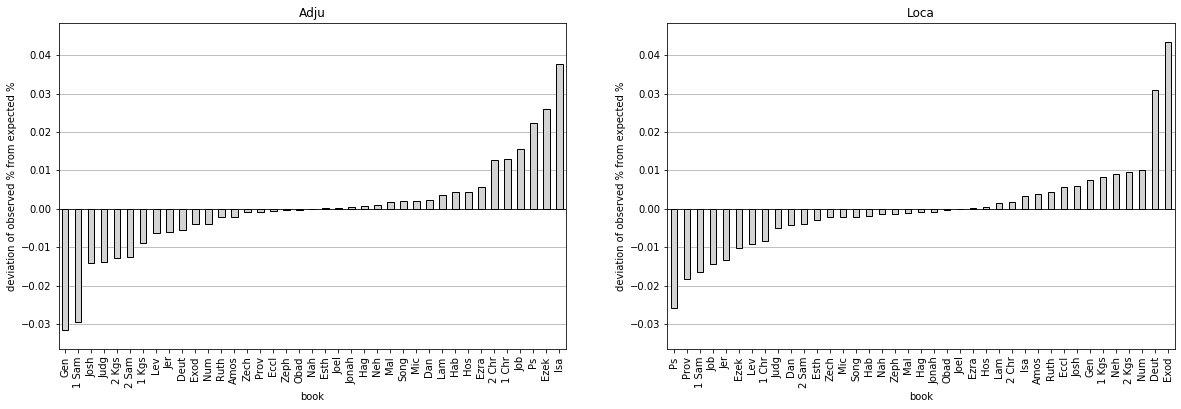

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax = ax1
book_dev_prop.loc['Adju'].sort_values().plot(kind='bar', ax=ax, color='lightgray', edgecolor='black')
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y')
ax.set_axisbelow(True) 
ax.set_ylabel('deviation of observed % from expected %', size=10)
ax.set_title('Adju')
ax.set_ylim(dev_min, dev_max)

ax=ax2
book_dev_prop.loc['Loca'].sort_values().plot(kind='bar', ax=ax, color='lightgray', edgecolor='black')
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y')
ax.set_axisbelow(True) 
ax.set_ylabel('deviation of observed % from expected %', size=10)
ax.set_title('Loca')
ax.set_ylim(dev_min, dev_max)

savefig('devProp_book_Adju_Loca')

plt.show()

In [22]:
book_dev_prop.loc['Adju'].abs().sort_values(ascending=False)

book
Isa      0.037653
Gen      0.031575
1 Sam    0.029389
Ezek     0.026012
Ps       0.022299
Job      0.015639
Josh     0.014031
Judg     0.013940
1 Chr    0.012924
2 Chr    0.012769
2 Kgs    0.012693
2 Sam    0.012493
1 Kgs    0.008928
Lev      0.006200
Jer      0.006113
Ezra     0.005601
Deut     0.005468
Hos      0.004374
Hab      0.004344
Exod     0.003954
Num      0.003944
Lam      0.003685
Dan      0.002399
Ruth     0.002227
Amos     0.002107
Mic      0.002058
Song     0.001910
Mal      0.001836
Neh      0.001004
Zech     0.000940
Prov     0.000895
Hag      0.000715
Eccl     0.000590
Jonah    0.000565
Zeph     0.000408
Joel     0.000278
Obad     0.000235
Esth     0.000110
Nah      0.000045
Name: Adju, dtype: float64

In [23]:
book_dev_prop.loc['Loca'].sort_values()

book
Ps      -0.025749
Prov    -0.018373
1 Sam   -0.016557
Job     -0.014439
Jer     -0.013447
Ezek    -0.010300
Lev     -0.009093
1 Chr   -0.008254
Judg    -0.004881
Dan     -0.004239
2 Sam   -0.003985
Esth    -0.002956
Zech    -0.002213
Mic     -0.002200
Song    -0.002055
Hab     -0.001905
Nah     -0.001402
Zeph    -0.001379
Mal     -0.000958
Hag     -0.000749
Jonah   -0.000700
Obad    -0.000316
Joel    -0.000085
Ezra     0.000155
Hos      0.000494
Lam      0.001496
2 Chr    0.001896
Isa      0.003361
Amos     0.003955
Ruth     0.004290
Eccl     0.005667
Josh     0.006040
Gen      0.007536
1 Kgs    0.008268
Neh      0.009017
2 Kgs    0.009465
Num      0.010183
Deut     0.031065
Exod     0.043347
Name: Loca, dtype: float64

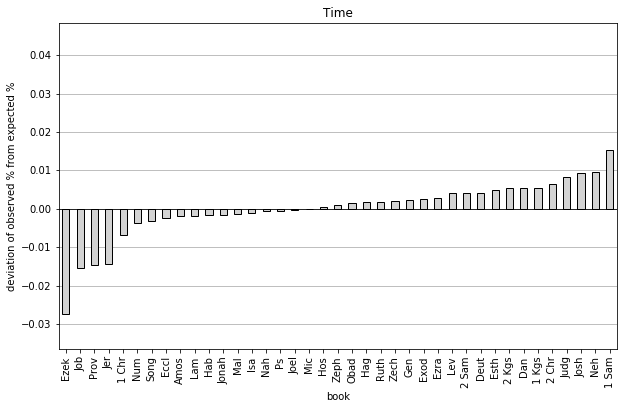

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
book_dev_prop.loc['Time'].sort_values().plot(kind='bar', ax=ax, color='lightgray', edgecolor='black')
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y')
ax.set_axisbelow(True) 
ax.set_ylabel('deviation of observed % from expected %', size=10)
ax.set_title('Time')
ax.set_ylim(dev_min, dev_max)
savefig('devProp_book_Time')
plt.show()

In [25]:
book_dev_prop.loc['Time'].abs().sort_values(ascending=False)

book
Ezek     0.027363
Job      0.015462
1 Sam    0.015246
Prov     0.014718
Jer      0.014480
Neh      0.009477
Josh     0.009328
Judg     0.008170
1 Chr    0.006748
2 Chr    0.006502
1 Kgs    0.005476
Dan      0.005411
2 Kgs    0.005409
Esth     0.004961
Deut     0.004179
2 Sam    0.004089
Lev      0.004069
Num      0.003611
Song     0.003128
Ezra     0.002737
Exod     0.002513
Gen      0.002398
Eccl     0.002312
Zech     0.002074
Ruth     0.001868
Amos     0.001767
Lam      0.001751
Hag      0.001698
Hab      0.001686
Obad     0.001636
Jonah    0.001635
Mal      0.001289
Isa      0.001112
Zeph     0.000930
Nah      0.000688
Ps       0.000522
Hos      0.000519
Joel     0.000333
Mic      0.000084
Name: Time, dtype: float64

In [26]:
book_dev_prop.loc['Loca'].sum()

1.1058862159352145e-17

### DP by chapter

In [27]:
funct_sample2 = funct_sample.copy()
funct_sample2['chapter_node'] = [L.u(ph,'chapter')[0] for ph in funct_sample.index]

In [28]:
chapt_counts = pd.pivot_table(
    funct_sample2,
    index='s_function',
    columns=['chapter_node'],
    aggfunc='size',
    fill_value=0,
)

chapt_counts

chapter_node,426624,426625,426626,426627,426628,426629,426630,426631,426632,426633,...,427543,427544,427545,427546,427547,427548,427549,427550,427551,427552
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,15,4,9,3,4,6,9,5,9,16,...,4,19,28,21,22,22,13,17,27,13
Cmpl,28,31,40,34,3,26,20,27,33,16,...,9,48,37,41,25,58,38,66,42,36
Loca,4,3,2,1,0,7,5,2,4,3,...,5,5,1,3,4,1,8,2,2,3
Objc,38,29,24,36,38,23,10,17,20,15,...,6,25,36,31,23,43,30,50,22,28
Subj,62,41,38,48,35,39,35,32,34,37,...,12,32,56,34,23,48,25,36,38,25
Time,1,5,5,4,19,4,11,16,4,4,...,4,6,8,11,2,6,5,5,11,7


In [29]:
ch_exp_prop = chapt_counts.sum(0) / chapt_counts.sum(0).sum()
ch_obv_prop = chapt_counts.div(chapt_counts.sum(1), 0)
ch_dev_prop = ch_obv_prop.sub(ch_exp_prop, 1)
ch_DP = abs(ch_dev_prop).sum(1) / 2
ch_DP = ch_DP.sort_values()

ch_DP

s_function
Subj    0.106349
Cmpl    0.115363
Objc    0.125961
Adju    0.231904
Time    0.287240
Loca    0.344565
dtype: float64

### DP determined using clause clusters

In [30]:
# build clusters of clauses into a column that can be added DF
cluster_size = 10
cl_clusters = []
this_cluster = []
for cl in F.otype.s('clause'):
    this_cluster.append(cl)
    if len(this_cluster) == cluster_size:
        cl_clusters.append(this_cluster)
        this_cluster = []
cl_clusters.append(this_cluster) # finish the last short cluster
        
print(len(cl_clusters), 'clusters of size', cluster_size, 'built')
print(len(cl_clusters[-1]), 'short cluster added')

# map clustesr to sets of clauses
# that can be used for membership checks
clauses_2_id = []
for i, cluster in enumerate(cl_clusters):
    clauses_2_id.append((set(cluster), i))

# make a new column for the DF that maps a phrase 
# to its clause cluster group
phrase_clust_group = []
for ph in funct_sample.index:
    cl = L.u(ph, 'clause')[0]
    for clauses, cluster in clauses_2_id:
        if cl in clauses:
            phrase_clust_group.append(cluster)
            continue
            
print(len(phrase_clust_group), 'phrases assigned to clusters')

8813 clusters of size 10 built
1 short cluster added
99426 phrases assigned to clusters


In [31]:
funct_sample3 = funct_sample.copy()
funct_sample3['cl_cluster'] = phrase_clust_group

In [32]:
cl_counts = pd.pivot_table(
    funct_sample3,
    index='s_function',
    columns=['cl_cluster'],
    aggfunc='size',
    fill_value=0,
)
cl_counts

cl_cluster,0,1,2,3,4,5,6,7,8,9,...,8802,8803,8804,8805,8806,8807,8808,8809,8810,8811
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,0,0,0,1,2,0,0,2,2,6,...,1,1,0,1,3,1,3,2,0,2
Cmpl,2,4,2,2,0,6,3,0,0,2,...,7,7,4,8,3,5,5,4,2,3
Loca,0,0,0,1,0,2,0,0,1,0,...,0,0,0,0,0,0,1,1,0,1
Objc,2,3,1,5,3,2,1,3,3,5,...,0,1,6,0,1,2,3,7,5,3
Subj,9,6,6,5,5,4,6,4,5,4,...,4,2,4,2,4,0,3,1,4,5
Time,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,2,1,0,0,2,0


In [33]:
cl_exp_prop = cl_counts.sum(0) / cl_counts.sum(0).sum()
cl_obv_prop = cl_counts.div(cl_counts.sum(1), 0)
cl_dev_prop = cl_obv_prop.sub(cl_exp_prop, 1)
cl_DP = abs(cl_dev_prop).sum(1) / 2
cl_DP = cl_DP.sort_values()

cl_DP

s_function
Cmpl    0.204595
Subj    0.204797
Objc    0.256559
Adju    0.429225
Time    0.652365
Loca    0.750820
dtype: float64

### DP with Genre

In [34]:
genre_counts = pd.pivot_table(
    funct_sample2,
    index='s_function',
    columns=['genre'],
    aggfunc='size',
    fill_value=0,
)

genre_counts

genre,instruction,list,poetry,prophetic,prose
s_function,,,,,
Adju,938,463,1983,2670,3349
Cmpl,2908,659,4000,6090,15911
Loca,330,127,291,497,1352
Objc,2722,507,4157,5320,9688
Subj,2613,2032,5403,6760,14615
Time,376,89,500,723,2353


In [35]:
genre_exp_prop = genre_counts.sum(0) / genre_counts.sum(0).sum()
genre_obv_prop = genre_counts.div(genre_counts.sum(1), 0)
genre_dev_prop = genre_obv_prop.sub(genre_exp_prop, 1)
genre_DP = abs(genre_dev_prop).sum(1) / 2
genre_DP = genre_DP.sort_values()

genre_DP

s_function
Subj    0.033333
Objc    0.059147
Cmpl    0.062707
Loca    0.082730
Time    0.106873
Adju    0.119246
dtype: float64

In [36]:
genre_dev_prop.loc['Time']

genre
instruction   -0.006395
list          -0.016970
poetry        -0.040551
prophetic     -0.042957
prose          0.106873
Name: Time, dtype: float64

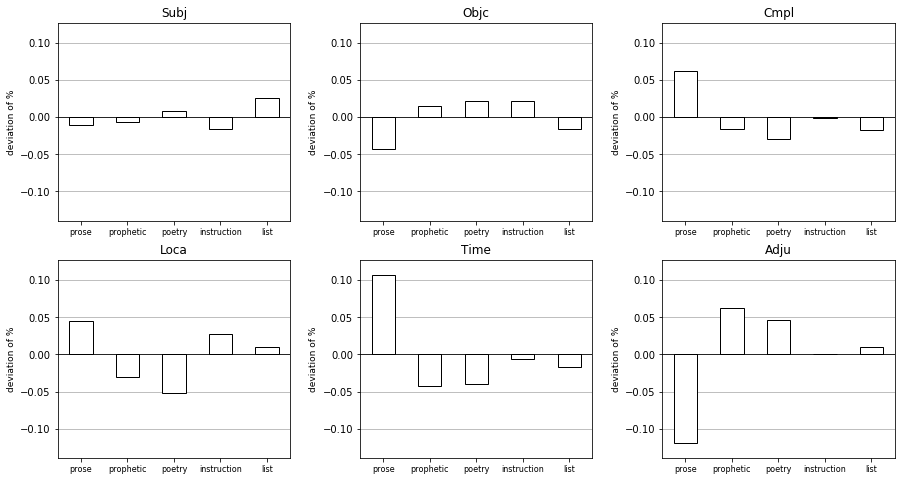

In [40]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()
plt.subplots_adjust(wspace=0.3, hspace=0.2)

dev_max = genre_dev_prop.max().max() + 0.02
dev_min = genre_dev_prop.min().min() - 0.02

funct_order = genre_dev_prop.abs().sum(1).sort_values()
genre_order = genre_counts.sum().sort_values(ascending=False).index

for i, funct in enumerate(funct_order.index):
    ax = axs[i]
    genre_dev_prop.loc[funct][genre_order].plot(ax=ax, kind='bar', color='white', edgecolor='black')
    ax.set_ylim(dev_min, dev_max)
    ax.grid(axis='y')
    ax.set_axisbelow(True)
    ax.set_title(funct)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), size=8, rotation=0)
    ax.set_ylabel('deviation of %', size=9)
    ax.axhline(0, color='black', linewidth=0.8)
    #ax.ax_hline(0)

savefig('devProp_genre')
plt.show()

In [43]:
genre_dev_prop.loc['Time']

genre
instruction   -0.006395
list          -0.016970
poetry        -0.040551
prophetic     -0.042957
prose          0.106873
Name: Time, dtype: float64

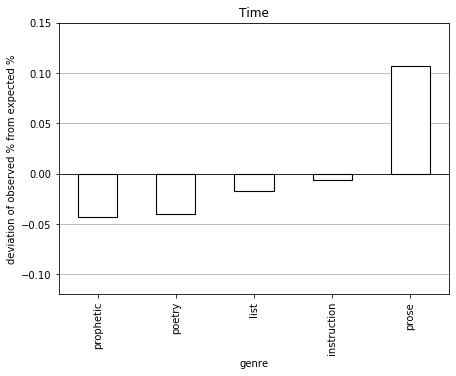

In [52]:
fig, ax = plt.subplots(figsize=(7, 5))
genre_dev_prop.loc['Time'].sort_values().plot(kind='bar', ax=ax, color='white', edgecolor='black', linewidth=1.1)
ax.set_ylim(-0.12, 0.15)
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y')
ax.set_axisbelow(True) 
ax.set_ylabel('deviation of observed % from expected %', size=10)
ax.set_title('Time')
savefig('devProp_Time_genre')
plt.show()

### subplots of book, chapter, and cluster DP

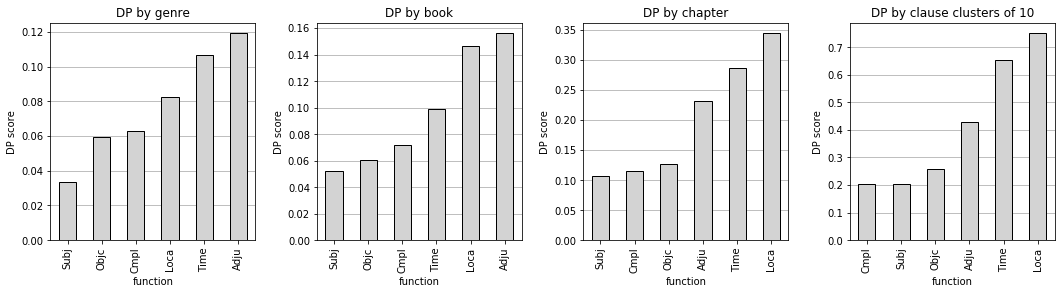

In [37]:
fig, axs = plt.subplots(1, 4, figsize=(18,4))
axs = axs.ravel()
titles = ['DP by genre', 'DP by book', 'DP by chapter', 'DP by clause clusters of 10', ]
plt.subplots_adjust(wspace=0.3)

all_dps = [genre_DP, book_DP, ch_DP, cl_DP]

for i, dp in enumerate(all_dps):
    ax=axs[i]
    dp.plot(kind='bar', ax=ax, color='lightgrey', edgecolor='black')
    ax.set_xlabel('function')
    ax.set_ylabel('DP score')
    ax.grid(axis='y')
    ax.set_axisbelow(True) 
    ax.set_title(titles[i])

savefig('DP_functions')

In [38]:
DP_book_ch_cl = pd.concat(all_dps, 1, sort=True)
DP_book_ch_cl.columns = ['genre_DP', 'book DP', 'chapter DP', 'clause cl. DP']
DP_book_ch_cl = DP_book_ch_cl.loc[DP_book_ch_cl.sum(1).sort_values().index]

DP_book_ch_cl.round(2).to_clipboard()

DP_book_ch_cl

,genre_DP,book DP,chapter DP,clause cl. DP
Subj,0.033333,0.052327,0.106349,0.204797
Cmpl,0.062707,0.072066,0.115363,0.204595
Objc,0.059147,0.060091,0.125961,0.256559
Adju,0.119246,0.156173,0.231904,0.429225
Time,0.106873,0.098690,0.287240,0.652365
Loca,0.082730,0.146234,0.344565,0.750820
